<a href="https://colab.research.google.com/github/VaibhavR2004/CodSoft_C-/blob/main/Final_Projects_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kaggle Competition for House Prices: Advanced Regression Techniques

![image.png](attachment:image.png)

In [60]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("train.csv")

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
pd.set_option('display.max_columns', None)


In [63]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [64]:
df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [65]:
df['MSZoning'].value_counts()

,count
MSZoning,
RL,1118
RM,214
FV,65
RH,15
C (all),10


In [66]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,56.775668,70.146723,10549.149789,6.146976,5.590717,1971.625879,1985.306610,104.935302,455.495077,47.793249,582.128692,1085.417018,1164.402954,351.066807,5.963432,1521.433193,0.436709,0.059072,1.563291,0.392405,2.867089,1.036568,6.521097,0.622363,1.776371,475.957103,96.068214,47.520394,22.004923,3.374121,15.463432,2.832630,40.994374,6.327004,2007.809423,182889.092124
std,42.250147,22.260343,10097.991235,1.359483,1.109678,30.379224,20.450801,181.942463,456.272479,163.279940,438.000178,409.135139,386.862462,437.877491,49.243868,526.353479,0.521058,0.241736,0.551247,0.505451,0.809810,0.198691,1.615997,0.645566,0.744147,213.223562,126.144490,66.695549,61.184375,29.329871,56.442878,40.708401,493.124430,2.714278,1.326754,79414.407095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7585.750000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,0.000000,247.250000,811.500000,882.000000,0.000000,0.000000,1138.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131625.000000
50%,50.000000,70.049958,9501.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,400.000000,0.000000,490.500000,1004.500000,1088.000000,0.000000,0.000000,1469.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,70.000000,79.000000,11635.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,727.000000,0.000000,814.750000,1309.750000,1392.000000,733.500000,0.000000,1786.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<Axes: >

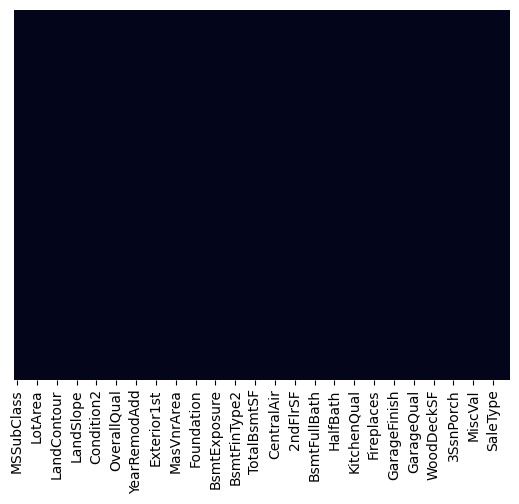

In [67]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [68]:
df.shape

(1422, 75)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1422 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   LotShape       1422 non-null   object 
 6   LandContour    1422 non-null   object 
 7   Utilities      1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemodAdd 

In [70]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [1]:
df.drop(['Alley'],axis=1,inplace=True)

NameError: name 'df' is not defined

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [ ]:
# WE drop the records having null values
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Feature: {column}")
    print(f"Unique values: {unique_values}\n")


In [ ]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Show the shape of the new dataframe
print(f"Original shape: {df.shape}")
print(f"Shape after one-hot encoding: {df_encoded.shape}")

# Display the first few rows of the new dataframe
df_encoded.head()


In [ ]:
for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    print(f"Feature: {column}")
    print(f"Unique values: {unique_values}\n")


In [ ]:
X=df_encoded.drop(['SalePrice'],axis=1)
Y=df_encoded['SalePrice']


In [ ]:
print(X)
print(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

## Prediciton and selecting the Algorithm

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=1, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,Y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1,monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None)

In [ ]:
regressor.fit(X_train,Y_train)

In [ ]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
print(training_data_prediction)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

# R-squared error
score_1 = r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)


In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
# accuracy for prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R-squared error
score_1 = r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)


In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
for column in X_train.columns:
    unique_values = X_train[column].unique()
    print(f"Feature: {column}")
    print(f"Unique values: {unique_values}\n")


In [ ]:
# After training the model (as you already did)
# Extract feature importance from the trained model
importance = regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 15–20 most important features
top_features = importance_df.head(20)
print(top_features)

# Visualize the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 15-20 Most Important Features')
plt.show()


In [ ]:
# Step 1: Define the top 20 most important features
top_features = importance_df.head(20)['Feature'].values  # Already obtained from feature importance

# Step 2: Precompute unique values and ranges for faster access
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

important_categorical_features = [feature for feature in top_features if any(cat in feature for cat in categorical_features)]
important_numerical_features = [feature for feature in top_features if feature in numerical_features]

# Precompute unique values for categorical features
cat_feature_unique_vals = {feature.split('_')[0]: df[feature.split('_')[0]].unique() for feature in important_categorical_features}

# Precompute ranges for numerical features
num_feature_ranges = {feature: (df[feature].min(), df[feature].max()) for feature in important_numerical_features}

# Step 3: Get user input (with precomputed data)
def get_categorical_input(feature):
    original_feature = feature.split('_')[0]
    unique_values = cat_feature_unique_vals[original_feature]

    print(f"\nFor {original_feature}, available options are: {unique_values}")
    user_input = input(f"Please choose one of the options for {original_feature}: ")

    # Handle invalid inputs
    while user_input not in unique_values:
        print(f"Invalid input. Please choose one from: {unique_values}")
        user_input = input(f"Please choose one of the options for {original_feature}: ")

    return user_input

def get_numerical_input(feature):
    min_val, max_val = num_feature_ranges[feature]

    print(f"\nFor {feature}, the range of values is: [{min_val}, {max_val}]")
    user_input = input(f"Please enter a value for {feature} within this range: ")

    # Handle invalid inputs
    while not user_input.isdigit() or not (min_val <= float(user_input) <= max_val):
        print(f"Invalid input. Please enter a number within the range [{min_val}, {max_val}]")
        user_input = input(f"Please enter a value for {feature} within this range: ")

    return float(user_input)

# Step 4: Collect inputs
user_inputs = {}

for feature in important_categorical_features:
    user_inputs[feature] = get_categorical_input(feature)

for feature in important_numerical_features:
    user_inputs[feature] = get_numerical_input(feature)

# Step 5: Convert user input to DataFrame
user_input_df = pd.DataFrame([user_inputs])

# Ensure one-hot encoding is applied in the same way as during model training
user_input_encoded = pd.get_dummies(user_input_df).reindex(columns=X_train.columns, fill_value=0)

# Step 6: Make prediction
predicted_sale_price = regressor.predict(user_input_encoded)

print(f"\nPredicted Sale Price: {predicted_sale_price[0]}")

